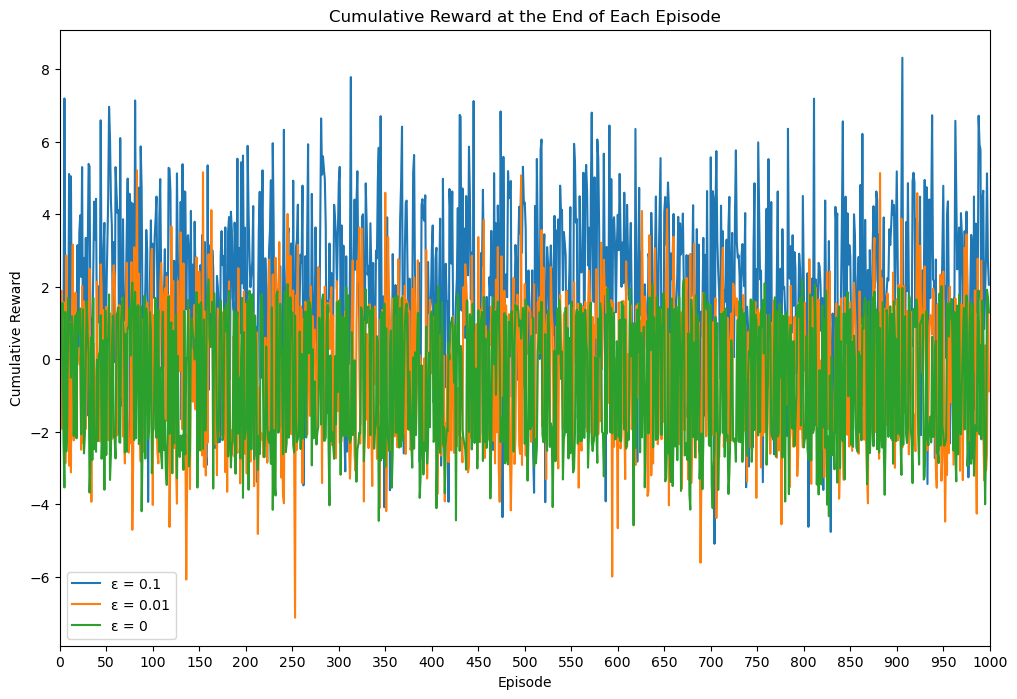

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the reward distributions
def reward_distribution(arm):
    if arm == 0:
        return np.random.normal(0, 1)
    elif arm == 1:
        return 3 if np.random.rand() <= 0.5 else -4
    elif arm == 2:
        return np.random.poisson(2)
    elif arm == 3:
        return np.random.normal(1, np.sqrt(2))
    elif arm == 4:
        return np.random.exponential(1)
    elif arm == 5:
        return reward_distribution(np.random.choice(5))

# ε-Greedy algorithm
def epsilon_greedy(epsilon, n_episodes, episode_length):
    n_arms = 6
    rewards = np.zeros(n_episodes)
    
    for episode in range(n_episodes):
        Q = np.zeros(n_arms)  # Estimated rewards for each arm
        N = np.zeros(n_arms)  # Number of times each arm is pulled

        for t in range(episode_length):
            if np.random.rand() < epsilon:
                arm = np.random.choice(n_arms)  # Exploration
            else:
                arm = np.argmax(Q)  # Exploitation

            reward = reward_distribution(arm)
            N[arm] += 1
            Q[arm] += (reward - Q[arm]) / N[arm]  # Update rule

        rewards[episode] = np.sum(Q)  # Total reward for the episode

    return rewards

# Simulation parameters
n_episodes = 1000
episode_length = 100
epsilons = [0.1, 0.01, 0]

# Run simulations
rewards_01 = epsilon_greedy(0.1, n_episodes, episode_length)
rewards_001 = epsilon_greedy(0.01, n_episodes, episode_length)
rewards_0 = epsilon_greedy(0, n_episodes, episode_length)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(rewards_01, label='ε = 0.1')
plt.plot(rewards_001, label='ε = 0.01')
plt.plot(rewards_0, label='ε = 0')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward at the End of Each Episode')
plt.legend()

plt.xlim(0, n_episodes)
plt.xticks(np.arange(0, n_episodes + 1, step=50))

plt.show()
